In [85]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from math import sqrt

In [8]:
from js import fetch
import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

resp = await fetch(boston_url)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

boston_df=pd.read_csv(ratings_url)

# Task 4: Descriptive Statistics and Visualizations

## Median value of owner-occupied homes:

In [27]:
boston_df['MEDV'].median()

21.2

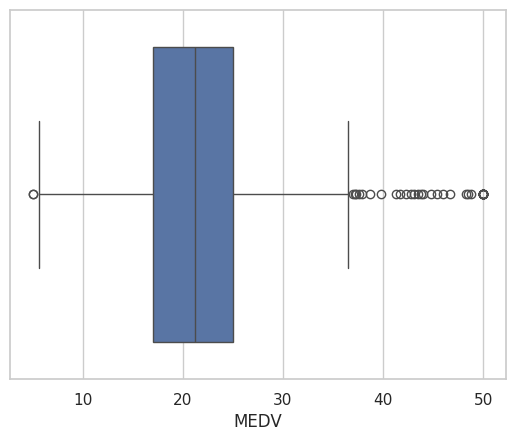

In [35]:
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.show()

## Bar plot for the Charles river variable

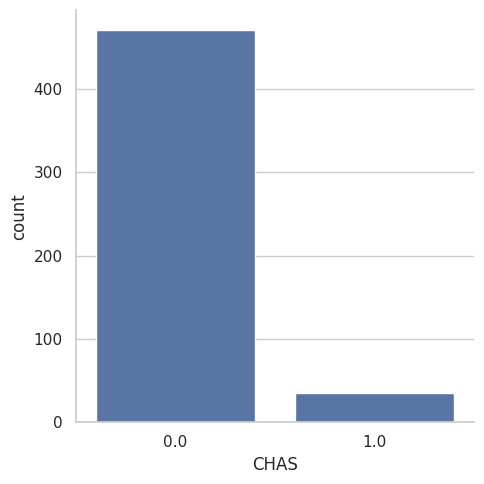

In [26]:
sns.set(style="whitegrid")
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.show()

## MEDV vs AGE

Boxplot for the MEDV variable vs the AGE variable

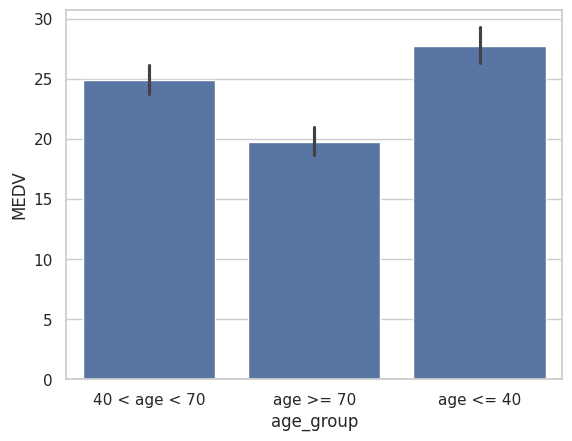

In [66]:
boston_df.loc[(boston_df['AGE'] <= 40), 'age_group'] = 'age <= 40'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '40 < age < 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = 'age >= 70'
sns.set(style="whitegrid")
ax = sns.barplot(x="age_group", y="MEDV", data=boston_df)
plt.show()


## Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

Scatter plot showing the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

From the plot, it is clear that a higher proportion of non-retail business acres per town leads to higher concentrations of Nitric oxide.

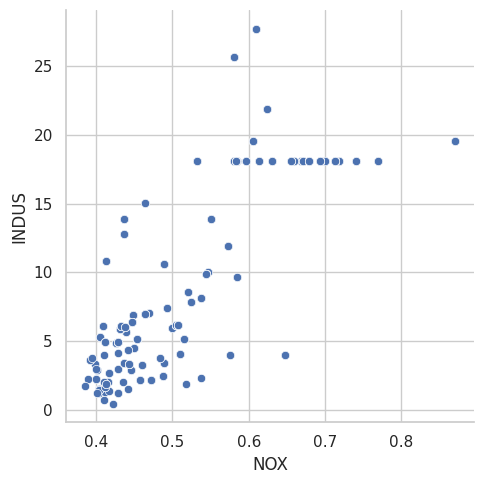

In [65]:
sns.relplot(x="NOX", y="INDUS", data=boston_df)
plt.show()

## Pupil to teacher ratio variable

Histogram for pupil to teacher ratio

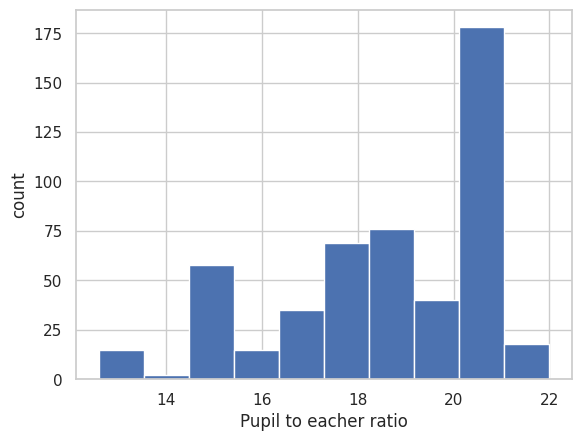

In [83]:
plt.hist(boston_df['PTRATIO'])
plt.xlabel('Pupil to eacher ratio')
plt.ylabel('count') 
plt.show()

# Task 5

## Significant difference in median value of houses bounded by the Charles river?

Hypothesis:

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median values between houses bounded and not bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median values between houses bounded and not bounded by the Charles river")

α = 0.05


Testing test significance:

In [90]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 we can not assume equality of variance. I will still proceed to do the T-test though (even though it is no longer reliable).

T-test:

In [94]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

The p value is much lower than α, meaning that we can reject the null hypothesis and thereby state that there is a difference in median values between houses bounded and not bounded by the Charles river

## Difference in median values of houses for each proportion of owner occupied units built prior to 1940?

Hypothesis:

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median values for each proportion of owner occupied units built prior to 1940")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median values for each proportion of owner occupied units built prior to 1940")

α = 0.05


In [98]:
below_forty = boston_df[boston_df['age_group'] == 'age <= 40']['MEDV']
between_forty_and_seventy = boston_df[boston_df['age_group'] == '40 < age < 70']['MEDV']
above_seventy = boston_df[boston_df['age_group'] == 'age >= 70']['MEDV']

scipy.stats.levene(below_forty,
                   between_forty_and_seventy, 
                   above_seventy, 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

The p-value is larger than 0.05, meaning that the variance are not equal

In [99]:
f_statistic, p_value = scipy.stats.f_oneway(below_forty, between_forty_and_seventy, above_seventy)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, I will reject the null hypothesis as there is significant evidence that at least one of the means differ.


## Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Hypothesis:

*   $H\_0$: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1$: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

In [107]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the null hypothesis and conclude that there  exists a relationship between nitric oxide concentrations and proportion of non-retail business acres per town

## Impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

Hypothesis:

*   $H\_0: β1$ = 0 (Additional distance to employment center has no impact on the median value of owner occupied homes)
*   $H\_1: β1$ ≠ 0 (Additional distance to employment center has an impact on the median value of owner occupied homes)

In [110]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        23:58:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that additional weighted distance has an impact on the median value of owner occupied homes.
